NumPy Version: 1.16.0
Pandas Version: 0.23.4
Matplotlib Version: 3.0.2
Seaborn Version: 0.8.1


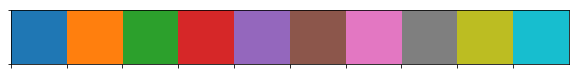

In [1]:
import numpy as np
print("NumPy Version: {}".format(np.__version__))
import pandas as pd
print("Pandas Version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib Version: {}".format(matplotlib.__version__))
import seaborn as sns
print("Seaborn Version: {}".format(sns.__version__))

%matplotlib inline

color = sns.color_palette()
sns.palplot(color)

In [2]:
# EDA
train_df = pd.read_csv("train_2016_v2.csv")
print("Number of rows: {}".format(train_df.shape[0]))
print("Number of cols: {}".format(train_df.shape[1]))
print('-'*30)
print(train_df.head())
print('-'*30)
print(train_df.describe())
print('-'*30)
print("Missing values:\n", train_df.isnull().sum())

Number of rows: 90275
Number of cols: 3
------------------------------
   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02
------------------------------
           parcelid      logerror
count  9.027500e+04  90275.000000
mean   1.298466e+07      0.011457
std    2.504510e+06      0.161079
min    1.071174e+07     -4.605000
25%    1.155950e+07     -0.025300
50%    1.254734e+07      0.006000
75%    1.422755e+07      0.039200
max    1.629608e+08      4.737000
------------------------------
Missing values:
 parcelid           0
logerror           0
transactiondate    0
dtype: int64


In [3]:
train_df.isnull().sum()

parcelid           0
logerror           0
transactiondate    0
dtype: int64

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


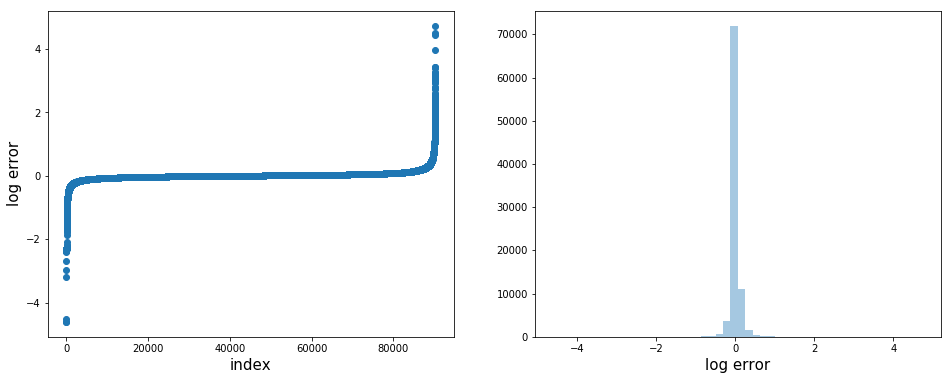

In [4]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror))
plt.xlabel('index', fontsize=15)
plt.ylabel('log error', fontsize=15)

plt.subplot(122)
sns.distplot(train_df.logerror, bins=50, kde=False)
plt.xlabel('log error', fontsize=15)

plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


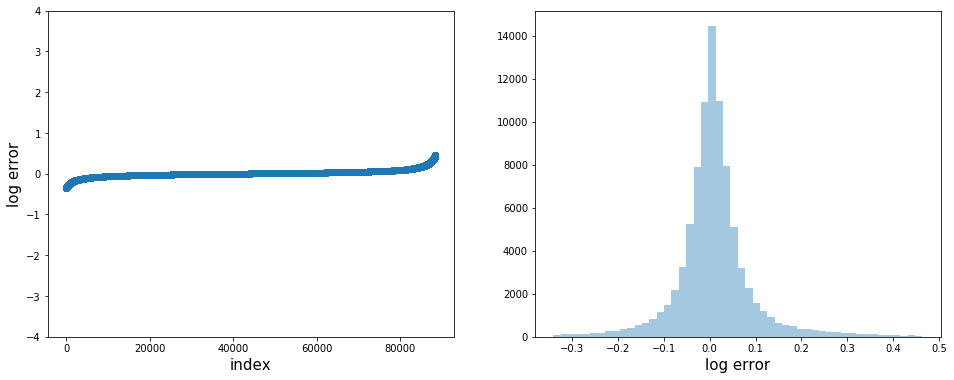

In [5]:
# we can see there are outliers on both ends
# removing outliers
train_df_copy = train_df.copy()
upper_bound = np.percentile(train_df_copy.logerror, 99)
lower_bound = np.percentile(train_df_copy.logerror, 1)
train_df_copy = train_df_copy.loc[(train_df_copy.logerror > lower_bound) & (train_df_copy.logerror < upper_bound)]

# again plot the same graphs
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.scatter(range(train_df_copy.shape[0]), np.sort(train_df_copy.logerror))
plt.xlabel('index', fontsize=15)
plt.ylabel('log error', fontsize=15)
plt.ylim([-4,4])

plt.subplot(122)
sns.distplot(train_df_copy.logerror, bins=50, kde=False)
plt.xlabel('log error', fontsize=15)

plt.show()

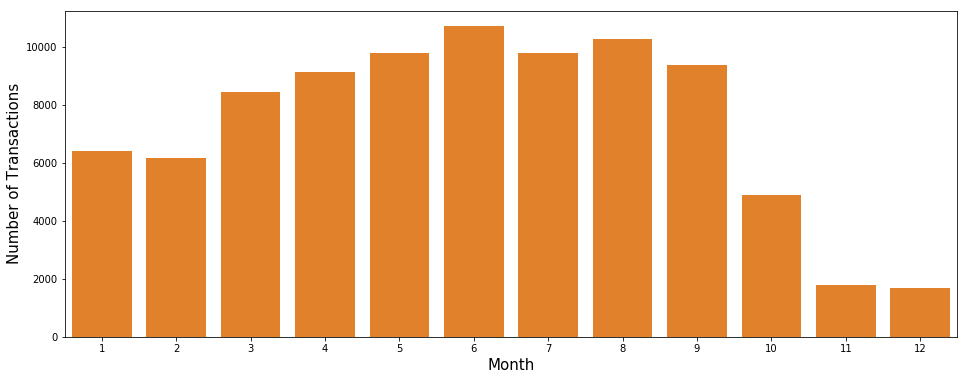

In [6]:
# explore the transaction date
train_df_copy.transactiondate = pd.to_datetime(train_df_copy.transactiondate)
train_df_copy['month'] = train_df_copy.transactiondate.dt.month
cnt_by_month = train_df_copy['month'].value_counts()

plt.figure(figsize=(16,6))

sns.barplot(cnt_by_month.index, cnt_by_month.values, color=color[1])
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Transactions", fontsize=15)
plt.show()

In [7]:
train_df_copy['parcelid'].value_counts().reset_index()['parcelid'].value_counts()

1    88228
2      117
3        1
Name: parcelid, dtype: int64

In [8]:
# EDA on properties
prop_df = pd.read_csv("properties_2016.csv")
print("Number of rows: {}".format(prop_df.shape[0]))
print("Number of cols: {}".format(prop_df.shape[1]))
print('-'*30)
prop_df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of rows: 2985217
Number of cols: 58
------------------------------


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


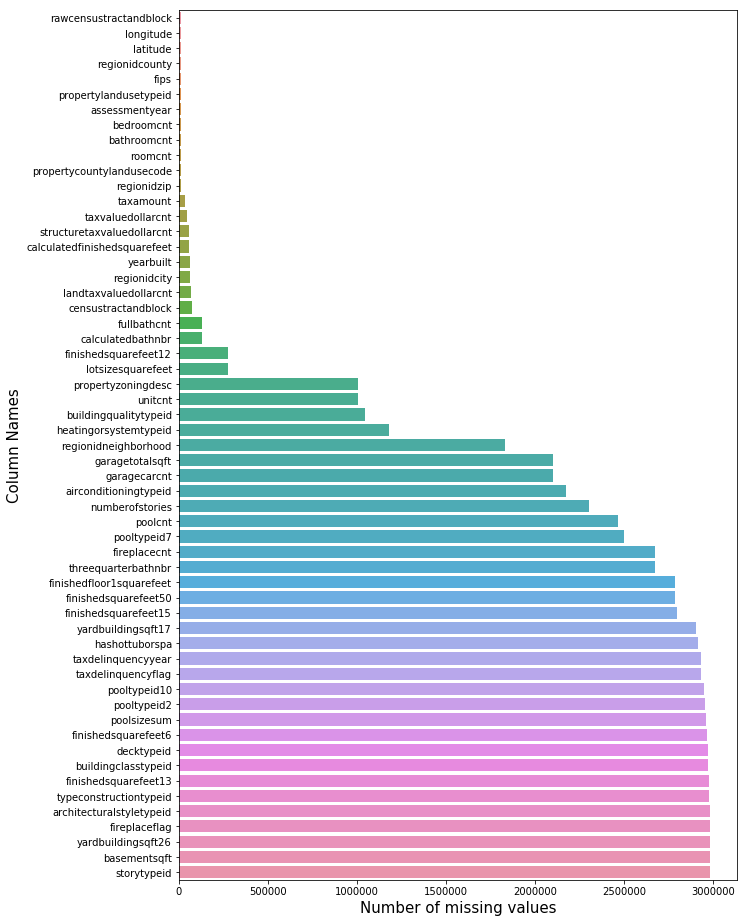

In [9]:
# missing values
missing_df = prop_df.isnull().sum().reset_index()
missing_df.columns = ['col_name', 'missing_count']
missing_df = missing_df.loc[missing_df.missing_count > 0]
missing_df = missing_df.sort_values(by='missing_count')

plt.figure(figsize=(10,16))

sns.barplot(x=missing_df.missing_count.values, y=missing_df.col_name.values)
plt.xlabel('Number of missing values', fontsize=15)
plt.ylabel('Column Names', fontsize=15)
plt.show()